In [1]:
%load_ext autoreload
import uproot as ut
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import re
import sympy as sp
import math
import vector


from tqdm import tqdm
import timeit

from utils import *
%autoreload 2

In [2]:
data_tree = Tree( fc.qcd_sr.JetHT_Run2018C_UL ,lazy=True)
lumikey=20182

In [3]:
qcd_tree = Tree( fc.qcd_sr.QCD_B_List ,lazy=True)

In [4]:
ttjet_tree = Tree(fc.qcd_sr.TTJets ,lazy=True)

In [5]:
trees = [data_tree,qcd_tree,ttjet_tree]

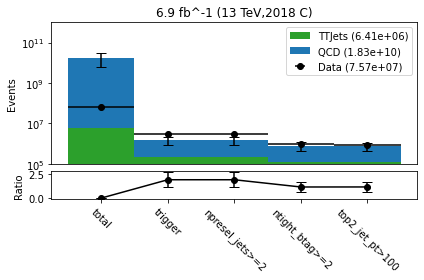

In [6]:
study.cutflow(trees,log=1,ratio=1,stacked=1,ylim=(1e5,1e12),lumikey=lumikey)

In [7]:
for tree in trees: print_raw_info(tree)

JetHT\_Run2018C & N/A & 68099424 & 888153 & 888153.00\\
QCD\_bEnriched\_HT100to200 & 1127000.0 & 36118284 & 12 & 22368.83\\
QCD\_bEnriched\_HT200to300 & 80430.0 & 18462184 & 356 & 92651.02\\
QCD\_bEnriched\_HT300to500 & 16620.0 & 11197722 & 24188 & 2144699.83\\
QCD\_bEnriched\_HT500to700 & 1487.0 & 9246898 & 125483 & 1205493.89\\
QCD\_bEnriched\_HT700to1000 & 296.5 & 1844165 & 42977 & 412787.21\\
QCD\_bEnriched\_HT1000to1500 & 46.61 & 1330829 & 44869 & 93879.00\\
QCD\_bEnriched\_HT1500to2000 & 3.72 & 1431254 & 55814 & 8666.32\\
QCD\_bEnriched\_HT2000toInf & 0.6462 & 401397 & 13427 & 1291.33\\
QCD\_HT100to200\_BGenFilter & 1275000.0 & 36346204 & 3 & 6286.92\\
QCD\_HT200to300\_BGenFilter & 111700.0 & 18762564 & 57 & 20272.21\\
QCD\_HT300to500\_BGenFilter & 27960.0 & 17127050 & 6398 & 623970.50\\
QCD\_HT500to700\_BGenFilter & 3078.0 & 8292039 & 24212 & 536912.06\\
QCD\_HT700to1000\_BGenFilter & 721.8 & 5952088 & 34763 & 251843.07\\
QCD\_HT1000to1500\_BGenFilter & 138.2 & 1953159 & 18504 &

In [8]:
ptbins = [20,40,60,80,100,120]
for tree in trees:
    tree.extend( **{ f"njet_pt{pt}": ak.sum(tree["jet_pt"]>pt,axis=-1) for pt in ptbins })

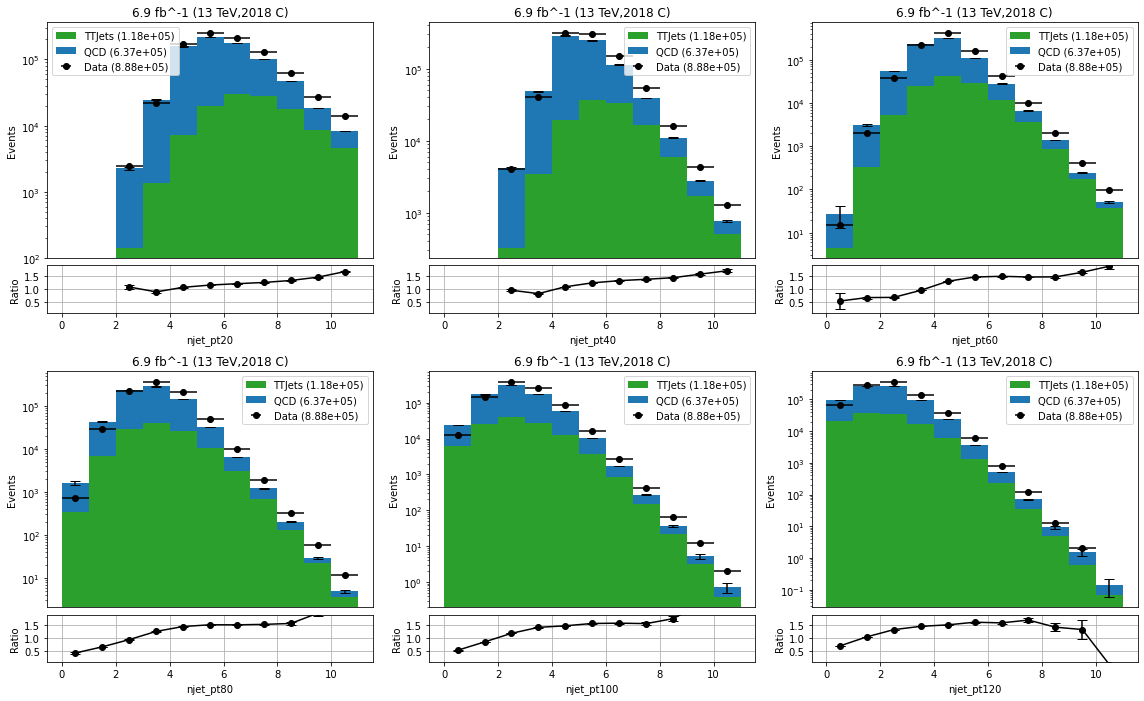

In [9]:
info = dict(log=1,ratio=1,r_ylim=(0.1,1.9),stacked=1,r_grid=True,flip=True,lumikey=lumikey)
study.quick(trees,varlist=[ f"njet_pt{pt}" for pt in ptbins ],binlist=[range(12)]*len(ptbins),**info)

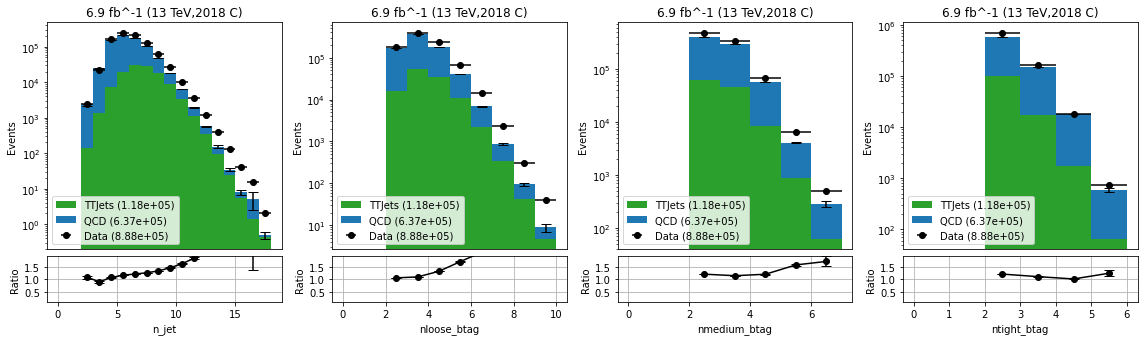

In [10]:
info = dict(log=1,ratio=1,r_ylim=(0.1,1.9),stacked=1,r_grid=True,flip=True,lumikey=lumikey)
study.njets(trees,**info)

In [11]:
masks = [ (tree["nmedium_btag"] >= 4)   for tree in trees ]

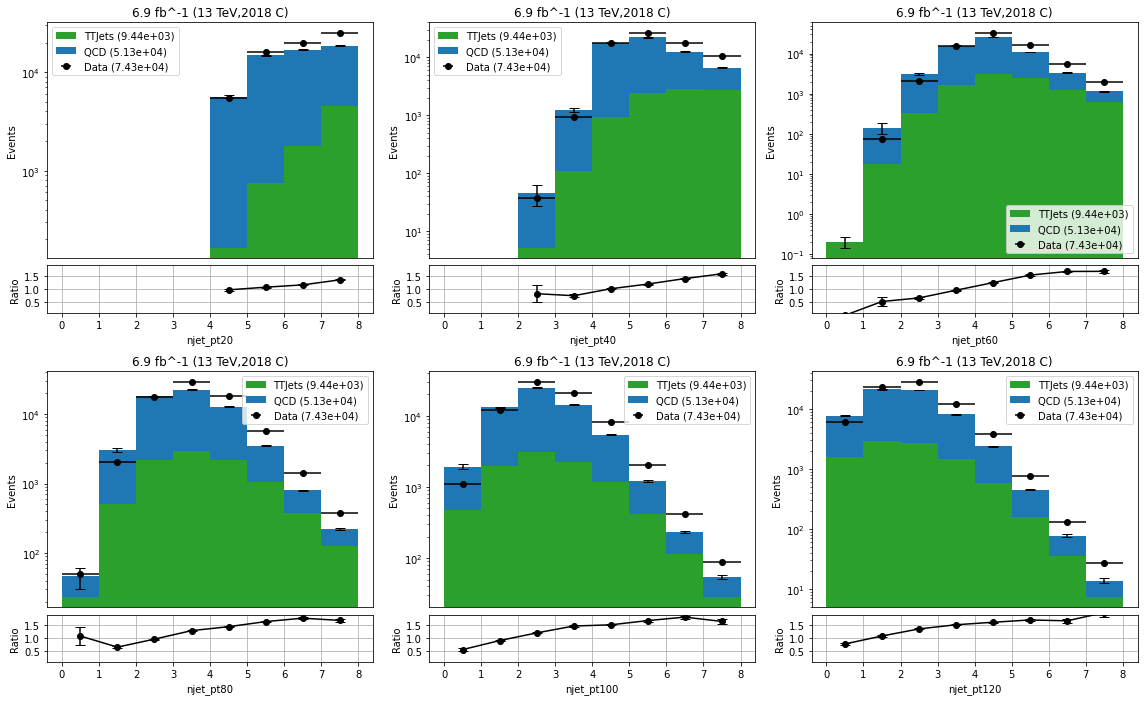

In [12]:
info = dict(log=1,ratio=1,r_ylim=(0.1,1.9),stacked=1,r_grid=True,flip=True,masks=masks,lumikey=lumikey)
study.quick(trees,varlist=[ f"njet_pt{pt}" for pt in ptbins ],binlist=[range(9)]*len(ptbins),**info)

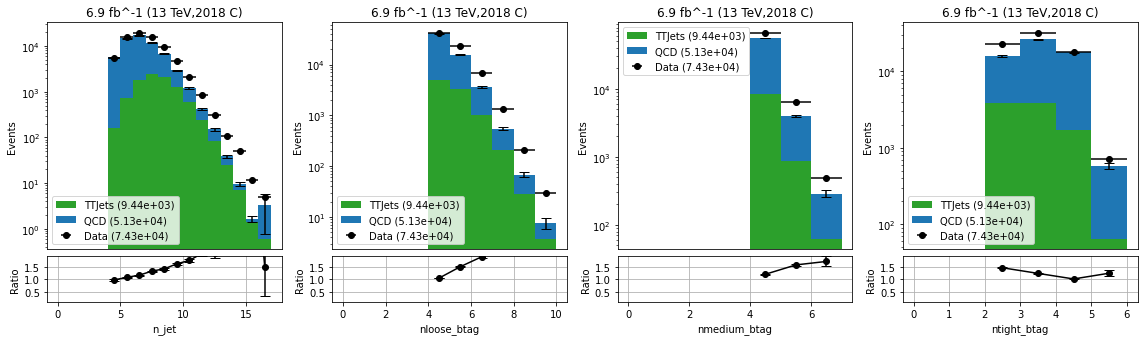

In [13]:
info = dict(log=1,ratio=1,r_ylim=(0.1,1.9),stacked=1,r_grid=True,flip=True,masks=masks,lumikey=lumikey)
study.njets(trees,**info)

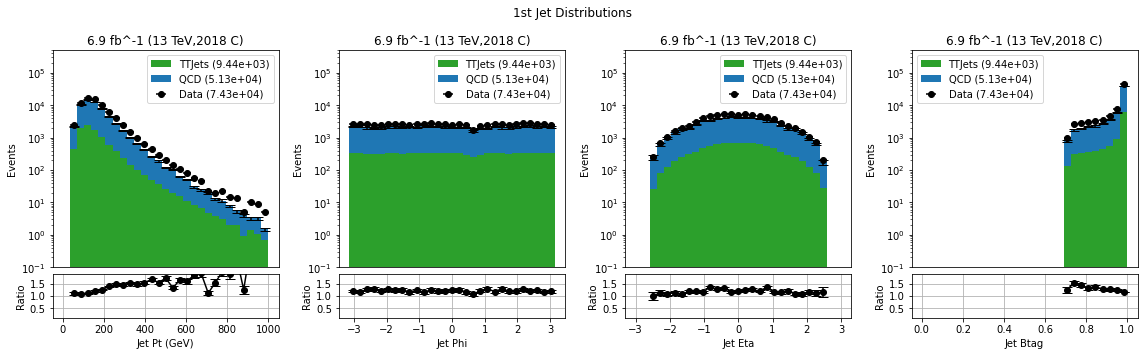

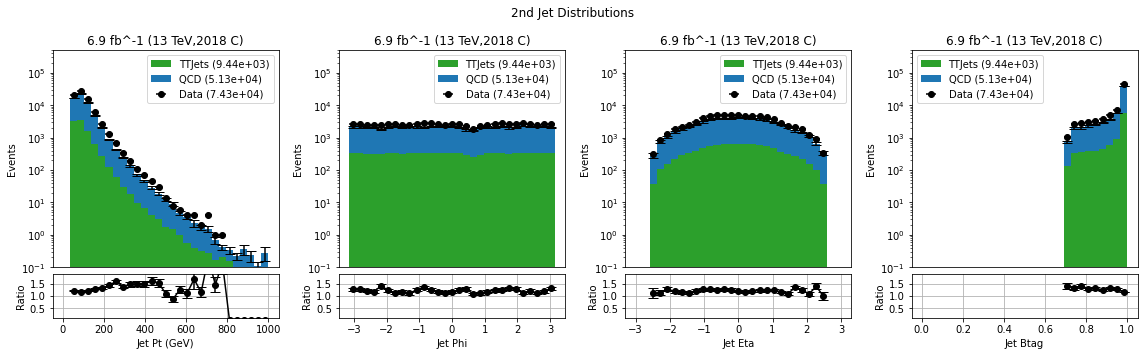

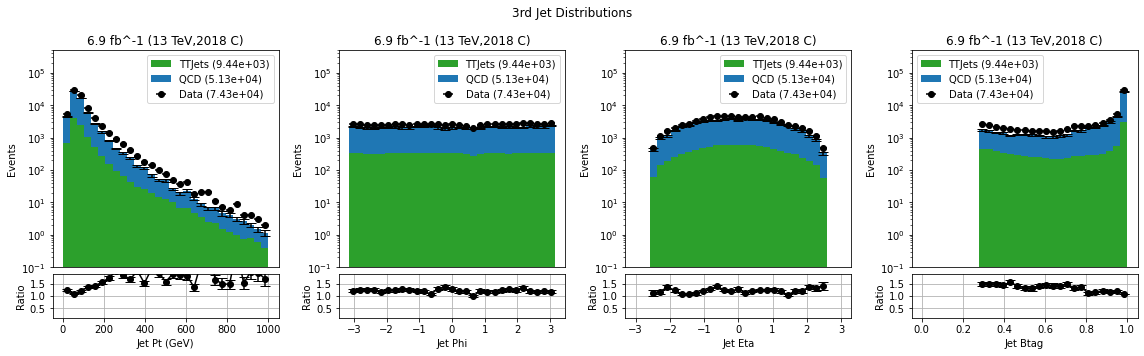

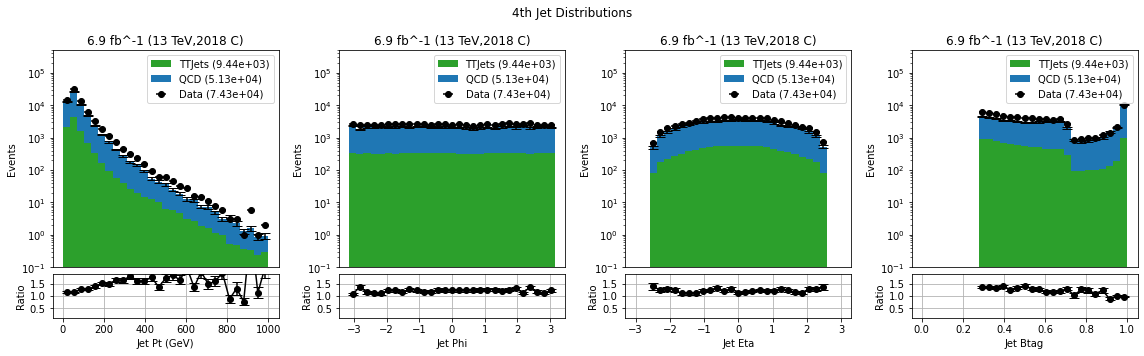

In [14]:
info = dict(log=1,ratio=1,r_ylim=(0.1,1.9),stacked=1,ylim=(1e-1,5e5),r_grid=True,flip=True,masks=masks,lumikey=lumikey)
study.ijets(trees,njets=4,**info)